In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import fitparse

In [4]:
path = "garmin_data/"

In [82]:
with open(path+"customer_data/customer.json") as f:
    customer_data = json.load(f)

In [10]:
#Customer MetaData
customer_data

{'id': None,
 'firstName': 'Sujay',
 'middleName': None,
 'lastName': None,
 'fullName': 'Sujay',
 'namePrefix': None,
 'nameSuffix': None,
 'gender': None,
 'displayName': None,
 'username': 'SUJAY.NGRJ@GMAIL.COM',
 'primaryAddress': None,
 'primaryEmailAddress': {'emailAddress': 'sujay.ngrj@gmail.com',
  'type': None,
  'primary': True,
  'emailVerified': False,
  'emailVerificationTimestamp': None,
  'emailAddressId': '8fdd5243-6491-4863-80cd-13c577683166'},
 'primaryPhoneNumber': None,
 'locale': 'en_US',
 'type': None,
 'active': True,
 'version': 11,
 'lastUpdateDateTime': '2020-09-03T00:43:22Z',
 'createdDate': '2020-08-27T16:32:27Z',
 'customerLocation': {'countryCode': 'CA',
  'verified': True,
  'verifiedTimestamp': '2020-08-27T16:32:27Z'},
 'addresses': [],
 'emailAddresses': [],
 'phoneNumbers': [],
 'foreignIdentifiers': [],
 'loginInfo': None}

In [17]:
with open(path+"DI_CONNECT/DI-Connect-Fitness/sujay.ngrj@gmail.com_0_summarizedActivities.json") as f:
    activities = json.load(f)
    
#activity = pd.read_json(path+"DI_CONNECT/DI-Connect-Fitness/sujay.ngrj@gmail.com_0_summarizedActivities.json")

In [21]:
#List of dicts for Recorded Activities. ie: saved workouts. ActivityID doesnt seem to be correlated
#with any of the .fit files
activities

[{'summarizedActivitiesExport': [{'activityId': 5477858839,
    'uuidMsb': -7682223143349695130,
    'uuidLsb': -5352426744693110320,
    'name': 'Cardio',
    'activityType': 'indoor_cardio',
    'userProfileId': 88509892,
    'timeZoneId': 149,
    'beginTimestamp': 1599069149000,
    'eventTypeId': 9,
    'rule': 'private',
    'sportType': 'GENERIC',
    'startTimeGmt': 1599069149000.0,
    'startTimeLocal': 1599054749000.0,
    'duration': 3023978.02734375,
    'distance': 0.0,
    'elevationGain': 0.0,
    'elevationLoss': 0.0,
    'avgSpeed': 0.0,
    'avgHr': 141.0,
    'maxHr': 174.0,
    'calories': 2048.9197799999997,
    'avgFractionalCadence': 0.0,
    'maxFractionalCadence': 0.0,
    'elapsedDuration': 3051573.974609375,
    'movingDuration': 0.0,
    'deviceId': 3316782707,
    'minElevation': 19600.0,
    'maxElevation': 19600.0,
    'summarizedDiveInfo': {},
    'maxVerticalSpeed': 0.0,
    'lapCount': 3,
    'waterEstimated': 302.0,
    'parent': False,
    'purposefu

In [66]:

extension = "DI_CONNECT/DI-Connect-Fitness-Uploaded-Files/UploadedFiles_0-_Part1/"
filename="sujay.ngrj@gmail.com_65901324815.fit"
fitfile = fitparse.FitFile(path+extension+filename,data_processor=fitparse.StandardUnitsDataProcessor())

messages = fitfile.messages
data = []

for m in messages:
    if not hasattr(m, 'fields'):
        continue
    fields = m.fields
    mdata = {}
    for field in fields:
        mdata[field.name] = field.value
        data.append(mdata)
df = pd.DataFrame(data)

In [67]:
df.columns

Index(['serial_number', 'time_created', 'manufacturer', 'garmin_product',
       'number', 'unknown_6', 'type', 'timestamp', 'software_version',
       'version', 'local_timestamp', 'cycles_to_distance',
       'cycles_to_calories', 'unknown_7', 'resting_metabolic_rate',
       'activity_type', 'unknown_8', 'distance', 'cycles', 'active_time',
       'active_calories', 'duration_min', 'steps', 'unknown_35', 'unknown_36',
       'unknown_37', 'unknown_38', 'unknown_253', 'unknown_0', 'unknown_1',
       'enabled', 'unknown_2', 'stress_level_time', 'stress_level_value',
       'unknown_3', 'unknown_4', 'timestamp_16', 'heart_rate', 'intensity',
       'current_activity_type_intensity', 'unknown_15', 'data', 'data16',
       'event', 'event_type', 'unknown_14', 'unknown_16', 'descent',
       'moderate_activity_minutes', 'vigorous_activity_minutes'],
      dtype='object')

In [68]:
len(df), len(df.dropna(subset=['heart_rate']))

(7956, 928)

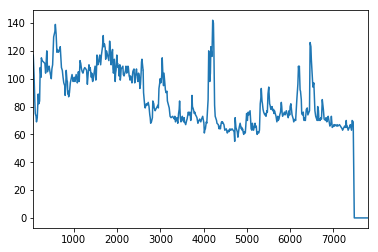

In [70]:
df.dropna(subset=['heart_rate'])[['timestamp_16', 'heart_rate']]['heart_rate'].plot()

In [12]:
import os

for filename in os.listdir(path+extension):
    if filename.endswith(".fit"):
        fitfile = fitparse.FitFile(path+extension+filename, data_processor=fitparse.StandardUnitsDataProcessor())
        messages = fitfile.messages
        
        data = []

        for m in messages:
            if not hasattr(m, 'fields'):
                continue
            fields = m.fields
            mdata = {}
            for field in fields:
                mdata[field.name] = field.value
                data.append(mdata)
        df = pd.DataFrame(data)
        df.columns
    else:
        continue